In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('df.csv')
# df['origin'].value_counts()

In [4]:
df.head()

,Used Date,From,To,Airline,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,...,Market Share,OTP Index,weather__hourly__windspeedKmph,weather__hourly__weatherDesc__value,weather__hourly__precipMM,weather__hourly__humidity,weather__hourly__visibility,weather__hourly__pressure,weather__hourly__cloudcover,Category
0,31-01-2020,DEL,HYD,Air Asia,06:05,605,06:04,604,08:15,815,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
1,31-01-2020,DEL,HYD,Indigo,04:50,450,04:36,436,07:00,700,...,47.5,81.1,11,Partly cloudy,0,90,9,1012,57,0
2,30-01-2020,DEL,HYD,Air Asia,06:05,605,05:54,554,08:15,815,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
3,30-01-2020,DEL,HYD,Air Asia,17:40,1740,17:40,1740,19:55,1955,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
4,30-01-2020,DEL,HYD,Air Asia,19:50,1950,19:54,1954,22:10,2210,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,1


In [5]:
# Perform one-hot encoding on 'From' (origin) and 'To' (destination) columns
df_encoded = pd.get_dummies(df, columns=['From', 'To','Airline'], dtype= int, drop_first=True)

# Display the first few rows of the resulting DataFrame
df_encoded.head()


,Used Date,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,Arrival,ARR,Departure Delay,...,From_CCU,From_DEL,To_DEL,To_HYD,Airline_Air India,Airline_Go Air,Airline_Indigo,Airline_SpiceJet,Airline_Spicejet,Airline_Vistara
0,31-01-2020,06:05,605,06:04,604,08:15,815,08:16,816,-1,...,0,1,0,1,0,0,0,0,0,0
1,31-01-2020,04:50,450,04:36,436,07:00,700,06:55,655,-14,...,0,1,0,1,0,0,1,0,0,0
2,30-01-2020,06:05,605,05:54,554,08:15,815,08:02,802,-11,...,0,1,0,1,0,0,0,0,0,0
3,30-01-2020,17:40,1740,17:40,1740,19:55,1955,19:42,1942,0,...,0,1,0,1,0,0,0,0,0,0
4,30-01-2020,19:50,1950,19:54,1954,22:10,2210,22:14,2214,4,...,0,1,0,1,0,0,0,0,0,0


In [6]:
# Convert the 'Used Date' column to datetime format
df_encoded['Used Date'] = pd.to_datetime(df_encoded['Used Date'], format='%d-%m-%Y')

# Create a new column 'Month' by extracting the month from 'Used Date'
df_encoded['Month'] = df_encoded['Used Date'].dt.month

# Display the first few rows to verify
df_encoded.head()


,Used Date,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,Arrival,ARR,Departure Delay,...,From_DEL,To_DEL,To_HYD,Airline_Air India,Airline_Go Air,Airline_Indigo,Airline_SpiceJet,Airline_Spicejet,Airline_Vistara,Month
0,2020-01-31,06:05,605,06:04,604,08:15,815,08:16,816,-1,...,1,0,1,0,0,0,0,0,0,1
1,2020-01-31,04:50,450,04:36,436,07:00,700,06:55,655,-14,...,1,0,1,0,0,1,0,0,0,1
2,2020-01-30,06:05,605,05:54,554,08:15,815,08:02,802,-11,...,1,0,1,0,0,0,0,0,0,1
3,2020-01-30,17:40,1740,17:40,1740,19:55,1955,19:42,1942,0,...,1,0,1,0,0,0,0,0,0,1
4,2020-01-30,19:50,1950,19:54,1954,22:10,2210,22:14,2214,4,...,1,0,1,0,0,0,0,0,0,1


In [7]:
df_encoded

,Used Date,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,Arrival,ARR,Departure Delay,...,From_DEL,To_DEL,To_HYD,Airline_Air India,Airline_Go Air,Airline_Indigo,Airline_SpiceJet,Airline_Spicejet,Airline_Vistara,Month
0,2020-01-31,06:05,605,06:04,604,08:15,815,08:16,816,-1,...,1,0,1,0,0,0,0,0,0,1
1,2020-01-31,04:50,450,04:36,436,07:00,700,06:55,655,-14,...,1,0,1,0,0,1,0,0,0,1
2,2020-01-30,06:05,605,05:54,554,08:15,815,08:02,802,-11,...,1,0,1,0,0,0,0,0,0,1
3,2020-01-30,17:40,1740,17:40,1740,19:55,1955,19:42,1942,0,...,1,0,1,0,0,0,0,0,0,1
4,2020-01-30,19:50,1950,19:54,1954,22:10,2210,22:14,2214,4,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,2019-01-24,18:30,1830,18:30,1830,20:55,2055,21:01,2101,0,...,0,1,0,0,0,0,1,0,0,1
10714,2019-01-23,18:30,1830,18:30,1830,20:55,2055,21:00,2100,0,...,0,1,0,0,0,0,1,0,0,1
10715,2019-01-22,18:30,1830,18:38,1838,20:55,2055,21:06,2106,8,...,0,1,0,0,0,0,1,0,0,1
10716,2019-01-09,22:05,2205,00:40,40,00:25,25,02:52,252,155,...,1,0,1,0,0,0,0,1,0,1


In [8]:
df_encoded

,Used Date,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,Arrival,ARR,Departure Delay,...,From_DEL,To_DEL,To_HYD,Airline_Air India,Airline_Go Air,Airline_Indigo,Airline_SpiceJet,Airline_Spicejet,Airline_Vistara,Month
0,2020-01-31,06:05,605,06:04,604,08:15,815,08:16,816,-1,...,1,0,1,0,0,0,0,0,0,1
1,2020-01-31,04:50,450,04:36,436,07:00,700,06:55,655,-14,...,1,0,1,0,0,1,0,0,0,1
2,2020-01-30,06:05,605,05:54,554,08:15,815,08:02,802,-11,...,1,0,1,0,0,0,0,0,0,1
3,2020-01-30,17:40,1740,17:40,1740,19:55,1955,19:42,1942,0,...,1,0,1,0,0,0,0,0,0,1
4,2020-01-30,19:50,1950,19:54,1954,22:10,2210,22:14,2214,4,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,2019-01-24,18:30,1830,18:30,1830,20:55,2055,21:01,2101,0,...,0,1,0,0,0,0,1,0,0,1
10714,2019-01-23,18:30,1830,18:30,1830,20:55,2055,21:00,2100,0,...,0,1,0,0,0,0,1,0,0,1
10715,2019-01-22,18:30,1830,18:38,1838,20:55,2055,21:06,2106,8,...,0,1,0,0,0,0,1,0,0,1
10716,2019-01-09,22:05,2205,00:40,40,00:25,25,02:52,252,155,...,1,0,1,0,0,0,0,1,0,1


In [9]:
# Assuming you have pandas imported and df_encoded defined
unique_categories = df_encoded['weather__hourly__weatherDesc__value'].unique()
print(unique_categories)


['Partly cloudy' 'Cloudy' 'Patchy rain possible' 'Clear' 'Sunny'
 'Light rain shower' 'Patchy light drizzle' 'Overcast' 'Light drizzle'
 'Mist' 'Moderate or heavy rain shower' 'Thundery outbreaks possible'
 'Moderate rain at times' 'Moderate or heavy rain with thunder'
 'Patchy light rain with thunder' 'Moderate rain' 'Torrential rain shower'
 'Patchy light rain' 'Heavy rain at times' 'Heavy rain']


In [10]:
category_counts = df_encoded['weather__hourly__weatherDesc__value'].value_counts()
print(category_counts)


weather__hourly__weatherDesc__value
Partly cloudy                          6452
Clear                                  1111
Patchy rain possible                    936
Sunny                                   739
Cloudy                                  511
Light rain shower                       363
Moderate or heavy rain shower           239
Overcast                                 83
Torrential rain shower                   74
Moderate rain at times                   55
Thundery outbreaks possible              47
Patchy light rain with thunder           42
Mist                                     26
Moderate or heavy rain with thunder      10
Patchy light drizzle                      8
Patchy light rain                         7
Moderate rain                             5
Heavy rain at times                       5
Heavy rain                                3
Light drizzle                             2
Name: count, dtype: int64


In [11]:
# Define a mapping based on the severity of the weather conditions
# Lower values represent better weather conditions, higher values represent worse conditions.
weather_mapping = {
    'Sunny': 0,
    'Clear': 1,
    'Partly cloudy': 2,
    'Cloudy': 3,
    'Overcast': 4,
    'Light rain shower': 5,
    'Patchy rain possible': 6,
    'Moderate or heavy rain shower': 7,
    'Moderate rain at times': 8,
    'Moderate rain': 9,
    'Thundery outbreaks possible': 10,
    'Patchy light rain with thunder': 11,
    'Heavy rain at times': 12,
    'Heavy rain': 13,
    'Light drizzle': 14,
    'Patchy light drizzle': 15,
    'Mist': 16,
    'Torrential rain shower': 17,
    'Patchy light rain': 18,
    'Moderate or heavy rain with thunder': 19
}

# Apply this mapping to create a new encoded column
df_encoded['weather__hourly__weatherDesc__value_encoded'] = df_encoded['weather__hourly__weatherDesc__value'].map(weather_mapping)

# Display the first few rows to verify the new encoded column
df_encoded[['weather__hourly__weatherDesc__value', 'weather__hourly__weatherDesc__value_encoded']].head()


,weather__hourly__weatherDesc__value,weather__hourly__weatherDesc__value_encoded
0,Partly cloudy,2
1,Partly cloudy,2
2,Partly cloudy,2
3,Partly cloudy,2
4,Partly cloudy,2


In [12]:
x_train, x_test, y_train, y_test = train_test_split(df_encoded.drop('Departure Delay', axis=1), df_encoded['Departure Delay'], test_size=0.2, random_state=42)
scaler = StandardScaler()
columns_to_standardize = ['Distance', 'Passenger Load Factor','Airline Rating', 'Airport Rating', 'Market Share', 'OTP Index',
       'weather__hourly__windspeedKmph','weather__hourly__precipMM', 'weather__hourly__humidity',
       'weather__hourly__visibility', 'weather__hourly__pressure',
       'weather__hourly__cloudcover', 'Category']
x_train[columns_to_standardize] = scaler.fit_transform(x_train[columns_to_standardize])
x_test[columns_to_standardize] = scaler.transform(x_test[columns_to_standardize])

In [13]:
x_train.drop(columns=['Used Date', 'Scheduled Departure', 'SDEP', 'Departure', 'DEP',
       'Scheduled Arrival', 'SARR', 'Arrival', 'ARR','Arrival Delay',
        'weather__hourly__weatherDesc__value',
       ], inplace=True)
x_test.drop(columns=['Used Date', 'Scheduled Departure', 'SDEP', 'Departure', 'DEP',
       'Scheduled Arrival', 'SARR', 'Arrival', 'ARR','Arrival Delay',
        'weather__hourly__weatherDesc__value',
       ], inplace=True)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

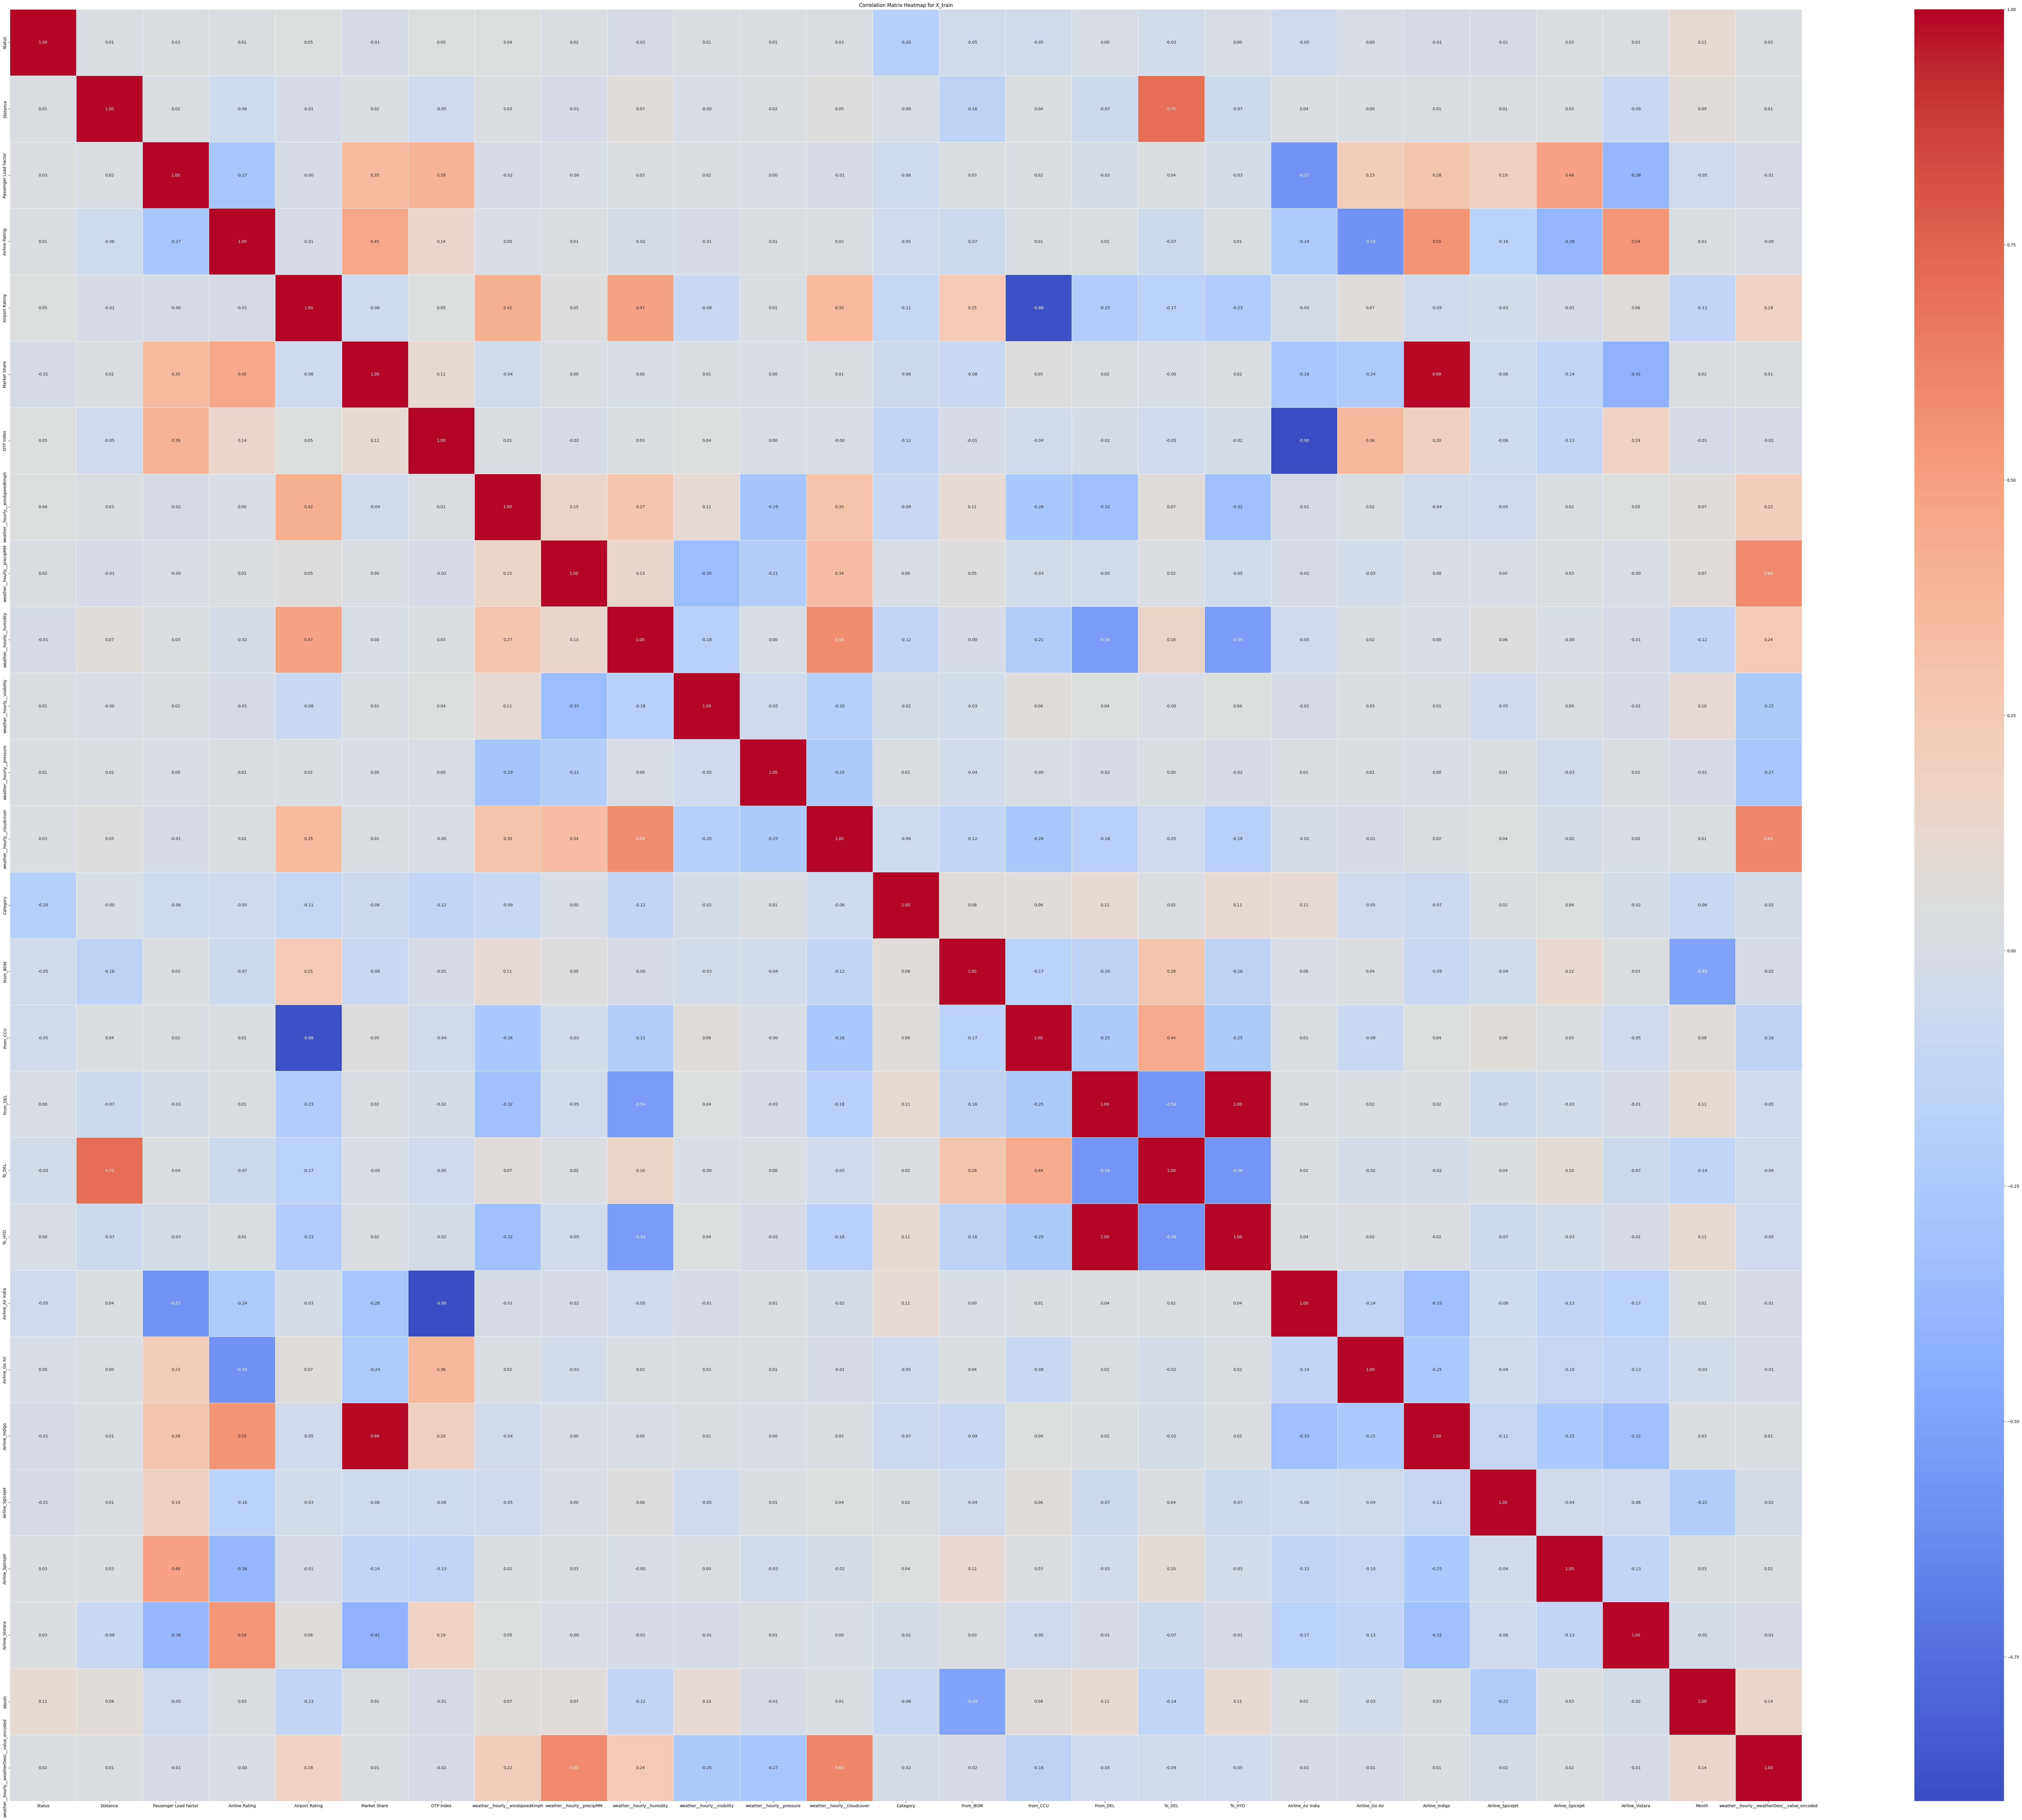

In [15]:
plt.figure(figsize=(100, 80))  # Set the figure size
sns.heatmap(x_train.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap for X_train')
plt.show()

In [16]:
correlation_matrix = x_train.corr()

print(correlation_matrix)


                                               Status  Distance  \
Status                                       1.000000  0.008217   
Distance                                     0.008217  1.000000   
Passenger Load Factor                        0.032163  0.017040   
Airline Rating                               0.011706 -0.060521   
Airport Rating                               0.045918 -0.005126   
Market Share                                -0.010841  0.024020   
OTP Index                                    0.046301 -0.054348   
weather__hourly__windspeedKmph               0.044901  0.027712   
weather__hourly__precipMM                    0.017191 -0.011555   
weather__hourly__humidity                   -0.006289  0.070229   
weather__hourly__visibility                  0.011622 -0.000387   
weather__hourly__pressure                    0.007611  0.019960   
weather__hourly__cloudcover                  0.025727  0.053566   
Category                                    -0.197802 -0.00109

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb

In [22]:
model = xgb.XGBRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Performance with XGBoost:")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Performance with XGBoost:
Mean Absolute Error: 7.449472679344784
R² Score: 0.9626004695892334


In [23]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor(random_state=42)

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Performance with HistGradientBoostingRegressor:")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Performance with HistGradientBoostingRegressor:
Mean Absolute Error: 7.506144401355687
R² Score: 0.9461549053557363


In [18]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Performance with all features:")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Performance with all features:
Mean Absolute Error: 7.136762057789311
R² Score: 0.9630962364528914


In [35]:
from sklearn.ensemble import BaggingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the HistGradientBoostingRegressor model as the base estimator
base_estimator = BaggingRegressor(random_state=42)

# Initialize BaggingRegressor with the base estimator, use estimator instead of base_estimator
bagging_regressor = BaggingRegressor(
    estimator=base_estimator, # Changed base_estimator to estimator
    n_estimators=8,  # Number of base estimators
    random_state=42
)

# Fit the BaggingRegressor to your training data
bagging_regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred_bagging = bagging_regressor.predict(x_test)

# Evaluate performance (e.g., using MAE and R-squared)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print("Bagging Regressor with HistGradientBoostingRegressor Performance:")
print(f"Mean Absolute Error: {mae_bagging}")
print(f"R² Score: {r2_bagging}")

Bagging Regressor with HistGradientBoostingRegressor Performance:
Mean Absolute Error: 7.162882917098079
R² Score: 0.9562182709593445


In [19]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [20]:
# print("training",np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring='r2')))
# print("testing",np.mean(cross_val_score(model, x_test, y_test, cv=5, scoring='r2')))

training 0.9693591880936536
testing 0.8378917444494721


In [24]:
!pip install lazypredict

In [26]:
!pip install dask[dataframe]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.7 MB/s eta 0:00:00


In [27]:
from lazypredict.Supervised import LazyRegressor

In [28]:
lazy_reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_reg.fit(x_train, x_test, y_train, y_test)

100%|██████████| 42/42 [02:00<00:00,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 8574, number of used features: 27
[LightGBM] [Info] Start training from score 26.753207


In [29]:
print("Model performance for predicting `arrdelay`:")
models

Model performance for predicting `arrdelay`:


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
BaggingRegressor,0.97,0.97,19.51,1.75
RandomForestRegressor,0.96,0.96,20.50,5.28
ExtraTreesRegressor,0.96,0.96,20.60,15.31
XGBRegressor,0.96,0.96,20.64,0.30
LGBMRegressor,0.95,0.95,24.77,0.26
HistGradientBoostingRegressor,0.95,0.95,24.77,0.65
DecisionTreeRegressor,0.94,0.94,26.00,0.34
GradientBoostingRegressor,0.94,0.94,26.08,1.28
KNeighborsRegressor,0.94,0.94,26.68,0.29


from matplotlib import pyplot as plt
_df_0['Adjusted R-Squared'].plot(kind='hist', bins=20, title='Adjusted R-Squared')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['R-Squared'].plot(kind='hist', bins=20, title='R-Squared')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Time Taken'].plot(kind='hist', bins=20, title='Time Taken')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Adjusted R-Squared', y='R-Squared', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='R-Squared', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='RMSE', y='Time Taken', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['Adjusted R-Squared']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('Adjusted R-Squared')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['R-Squared']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('R-Squared')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['RMSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'RMSE'}, axis=1)
              .sort_values('RMSE', ascending=True))
  xs = counted['RMSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['Adjusted R-Squared']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('Adjusted R-Squared')

from matplotlib import pyplot as plt
_df_11['Adjusted R-Squared'].plot(kind='line', figsize=(8, 4), title='Adjusted R-Squared')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['R-Squared'].plot(kind='line', figsize=(8, 4), title='R-Squared')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Time Taken'].plot(kind='line', figsize=(8, 4), title='Time Taken')
plt.gca().spines[['top', 'right']].set_visible(False)

In [30]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
BaggingRegressor,0.97,0.97,19.51,1.75
RandomForestRegressor,0.96,0.96,20.50,5.28
ExtraTreesRegressor,0.96,0.96,20.60,15.31
XGBRegressor,0.96,0.96,20.64,0.30
LGBMRegressor,0.95,0.95,24.77,0.26
HistGradientBoostingRegressor,0.95,0.95,24.77,0.65
DecisionTreeRegressor,0.94,0.94,26.00,0.34
GradientBoostingRegressor,0.94,0.94,26.08,1.28
KNeighborsRegressor,0.94,0.94,26.68,0.29


from matplotlib import pyplot as plt
models['Adjusted R-Squared'].plot(kind='hist', bins=20, title='Adjusted R-Squared')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models['R-Squared'].plot(kind='hist', bins=20, title='R-Squared')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models['Time Taken'].plot(kind='hist', bins=20, title='Time Taken')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models.plot(kind='scatter', x='Adjusted R-Squared', y='R-Squared', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models.plot(kind='scatter', x='R-Squared', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models.plot(kind='scatter', x='RMSE', y='Time Taken', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['Adjusted R-Squared']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('Adjusted R-Squared')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['R-Squared']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('R-Squared')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['RMSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'RMSE'}, axis=1)
              .sort_values('RMSE', ascending=True))
  xs = counted['RMSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['Adjusted R-Squared']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('Adjusted R-Squared')

from matplotlib import pyplot as plt
models['Adjusted R-Squared'].plot(kind='line', figsize=(8, 4), title='Adjusted R-Squared')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models['R-Squared'].plot(kind='line', figsize=(8, 4), title='R-Squared')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models['Time Taken'].plot(kind='line', figsize=(8, 4), title='Time Taken')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
def get_duplicate_columns(df):
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [ ]:
x_train.shape

(8574, 27)

In [ ]:
duplicate_columns = get_duplicate_columns(x_train)
duplicate_columns

{'From_DEL': ['To_HYD']}

In [ ]:
for one_list in duplicate_columns.values():
    x_train.drop(columns=one_list,inplace=True)
    x_test.drop(columns=one_list,inplace=True)

In [ ]:
x_train.shape

(8574, 26)

In [ ]:
corr_matrix = x_train.corr()

In [ ]:
columns = corr_matrix.columns

columns_to_drop = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if corr_matrix.loc[columns[i], columns[j]] > 0.8:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))
columns_to_drop = set(columns_to_drop)

1


In [ ]:
columns_to_drop

{'Airline_Indigo'}

In [ ]:
x_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
x_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
print("training",np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test, y_test, cv=5, scoring='r2')))

training 0.969731607030695
testing 0.8366687498530876


In [41]:
n_estimators_range = range(100, 301, 20)
train_scores = []
test_scores = []

# Calculate training and testing scores
for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Cross-validate on training data
    train_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_score)

    # Cross-validate on testing data
    test_score = cross_val_score(model, x_test, y_test, cv=5, scoring='r2').mean()
    test_scores.append(test_score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, marker='o', label='Training Score', color='blue')
plt.plot(n_estimators_range, test_scores, marker='o', label='Testing Score', color='orange')
plt.title('Training vs. Testing Scores')
plt.xlabel('Number of Estimators')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid()
plt.show()

KeyboardInterrupt: 

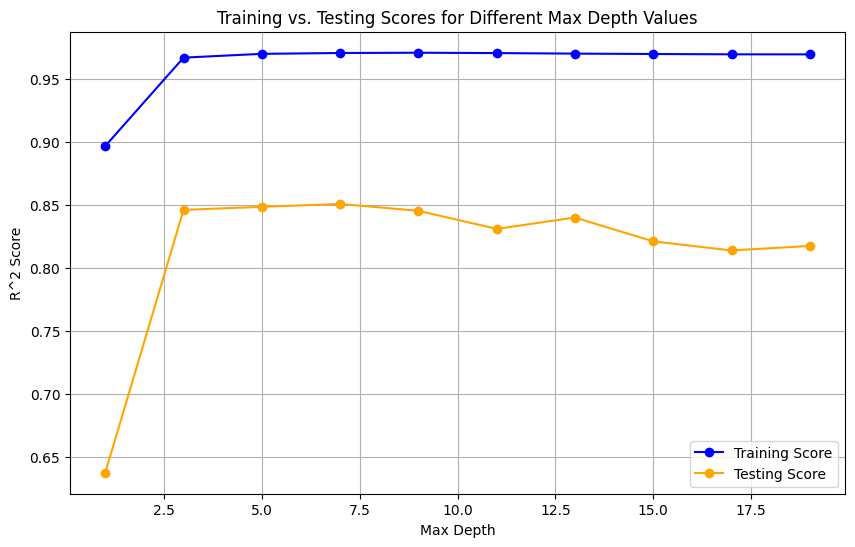

In [ ]:
max_depth_range = range(1, 21, 2)  # Testing values from 1 to 20
train_scores = []
test_scores = []

# Calculate training and testing scores
for max_depth in max_depth_range:
    model = RandomForestRegressor(max_depth=max_depth, random_state=42)

    # Cross-validate on training data
    train_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_score)

    # Cross-validate on testing data
    test_score = cross_val_score(model, x_test, y_test, cv=5, scoring='r2').mean()
    test_scores.append(test_score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_scores, marker='o', label='Training Score', color='blue')
plt.plot(max_depth_range, test_scores, marker='o', label='Testing Score', color='orange')
plt.title('Training vs. Testing Scores for Different Max Depth Values')
plt.xlabel('Max Depth')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
best_max_depth = max_depth_range[np.argmax(scores)]
print(f"Best max_depth: {best_max_depth}")

Best max_depth: 8


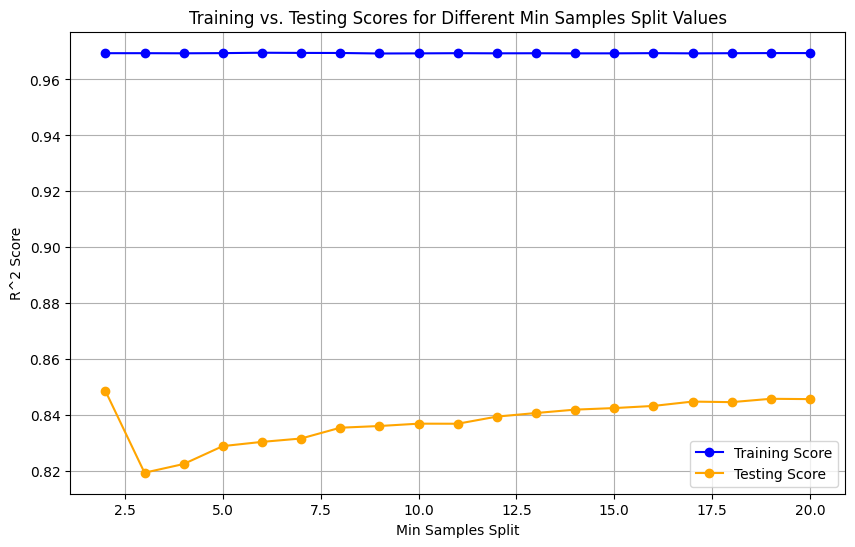

In [ ]:
min_samples_split_range = range(2, 21)  # Testing values from 2 to 20
train_scores = []
test_scores = []

# Calculate training and testing scores
for min_samples_split in min_samples_split_range:
    model = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)

    # Cross-validate on training data
    train_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_score)

    # Cross-validate on testing data
    test_score = cross_val_score(model, x_test, y_test, cv=5, scoring='r2').mean()
    test_scores.append(test_score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_range, train_scores, marker='o', label='Training Score', color='blue')
plt.plot(min_samples_split_range, test_scores, marker='o', label='Testing Score', color='orange')
plt.title('Training vs. Testing Scores for Different Min Samples Split Values')
plt.xlabel('Min Samples Split')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid()
plt.show()

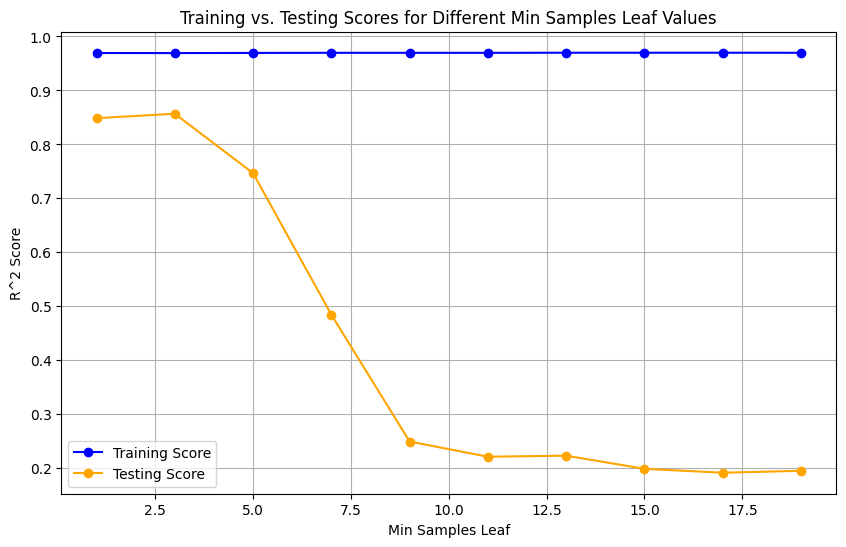

In [ ]:
min_samples_leaf_range = range(1, 21, 2)  # Testing values from 1 to 20
train_scores = []
test_scores = []

# Calculate training and testing scores
for min_samples_leaf in min_samples_leaf_range:
    model = RandomForestRegressor(min_samples_leaf=min_samples_leaf, random_state=42)

    # Cross-validate on training data
    train_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_score)

    # Cross-validate on testing data
    test_score = cross_val_score(model, x_test, y_test, cv=5, scoring='r2').mean()
    test_scores.append(test_score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_range, train_scores, marker='o', label='Training Score', color='blue')
plt.plot(min_samples_leaf_range, test_scores, marker='o', label='Testing Score', color='orange')
plt.title('Training vs. Testing Scores for Different Min Samples Leaf Values')
plt.xlabel('Min Samples Leaf')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid()
plt.show()

In [1]:
max_features_range = [None,'sqrt', 'log2', '5', '10', '15', '20']  # Different values for max_features
train_scores = []
test_scores = []

# Calculate training and testing scores
for max_features in max_features_range:
    model = RandomForestRegressor(max_features=max_features, random_state=42)

    # Cross-validate on training data
    train_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_score)

    # Cross-validate on testing data
    test_score = cross_val_score(model, x_test, y_test, cv=5, scoring='r2').mean()
    test_scores.append(test_score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(max_features_range, train_scores, marker='o', label='Training Score', color='blue')
plt.plot(max_features_range, test_scores, marker='o', label='Testing Score', color='orange')
plt.title('Training vs. Testing Scores for Different Max Features Values')
plt.xlabel('Max Features')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.legend()
plt.grid()
plt.show()

NameError: name 'RandomForestRegressor' is not defined

In [ ]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# sfs = SFS(model, k_features=20, forward=False, floating=False, scoring='r2',cv=5)

# sfs.fit(x_train, y_train)

In [37]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.7 MB/s eta 0:00:00


In [38]:

from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork

# Perform structure learning on X_train only
hc = HillClimbSearch(x_train)
best_model = hc.estimate(scoring_method=BicScore(x_train))

# Display the learned structure (edges)
print("Learned Structure:", best_model.edges())



  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned Structure: [('Distance', 'Airport Rating'), ('Distance', 'To_DEL'), ('Distance', 'From_BOM'), ('Distance', 'weather__hourly__weatherDesc__value_encoded'), ('Distance', 'Category'), ('Passenger Load Factor', 'Market Share'), ('Passenger Load Factor', 'Month'), ('Airline Rating', 'OTP Index'), ('Airline Rating', 'Airline_Indigo'), ('Airline Rating', 'Airline_Vistara'), ('Airline Rating', 'Airline_Go Air'), ('Airport Rating', 'From_CCU'), ('Airport Rating', 'From_DEL'), ('Airport Rating', 'weather__hourly__humidity'), ('Airport Rating', 'weather__hourly__windspeedKmph'), ('Airport Rating', 'weather__hourly__pressure'), ('Airport Rating', 'weather__hourly__cloudcover'), ('Market Share', 'Airline Rating'), ('Market Share', 'Airline_Spicejet'), ('Market Share', 'Airline_SpiceJet'), ('OTP Index', 'Airline_Air India'), ('Category', 'Status'), ('From_DEL', 'To_HYD'), ('Airline_Air India', 'Category'), ('Airline_Spicejet', 'Distance'), ('Month', 'Distance'), ('weather__hourly__weatherDes

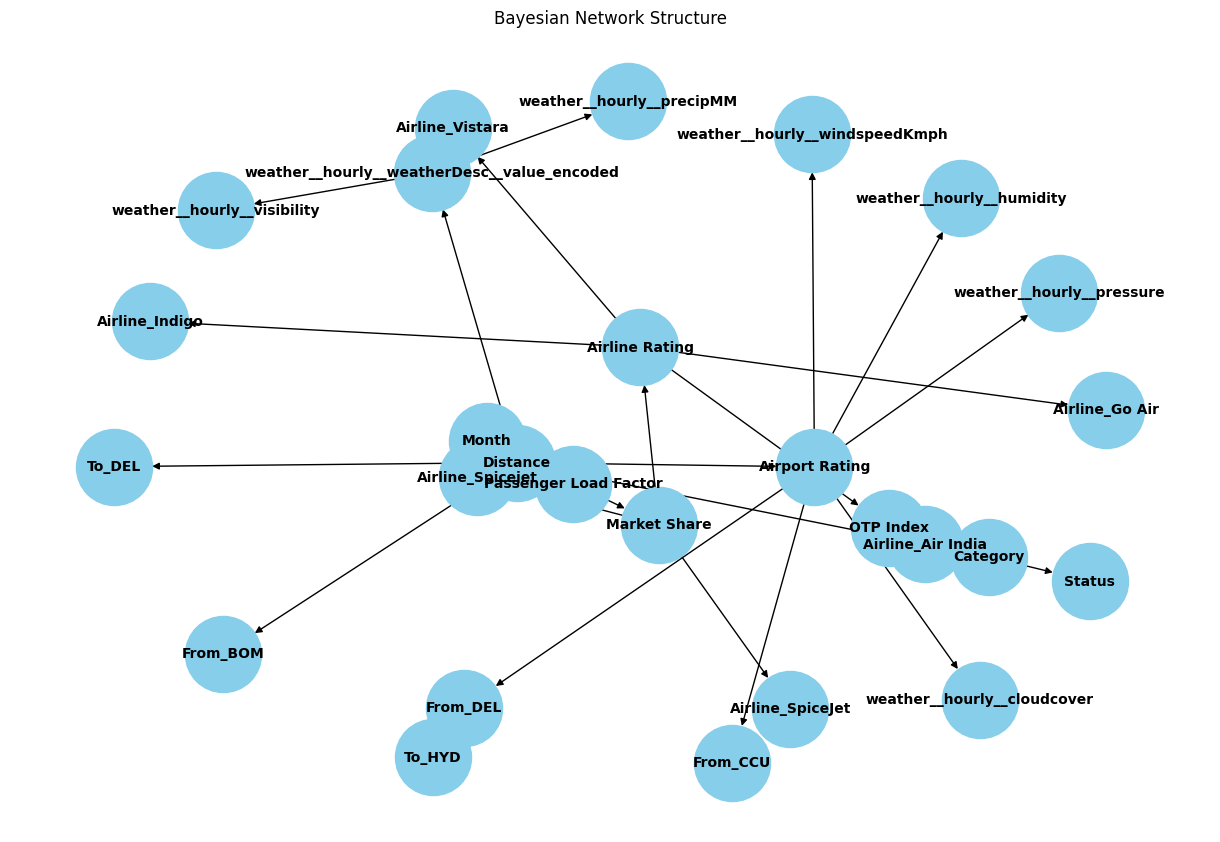

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert pgmpy Bayesian Network model to networkx graph for visualization
graph = nx.DiGraph()  # Directed graph for Bayesian Network
graph.add_edges_from(best_model.edges())  # Add edges to the graph

# Plot the Bayesian Network structure
plt.figure(figsize=(12, 8))
nx.draw(graph, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Bayesian Network Structure")
plt.show()



In [40]:
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.models import BayesianNetwork

# Initialize the Bayesian Network model with the learned structure
model = BayesianNetwork(best_model.edges())

# Fit the model using Maximum Likelihood Estimator
model.fit(x_train, estimator=MaximumLikelihoodEstimator)


In [ ]:
from pgmpy.inference import VariableElimination

# Use Variable Elimination for inference on the fitted model
inference = VariableElimination(model)
delay_reason_proxies = {
    "Weather-related": ["weather__hourly__windspeedKmph", "weather__hourly__precipMM", "weather__hourly__visibility", "weather__hourly__humidity"],
    "Operational": ["Airline Rating", "OTP Index", "Airport Rating"],
    "Route-related": ["From_BOM", "From_DEL", "To_DEL", "Distance"]
}

# Dictionary to store delay reason probabilities for each row
row_delay_reasons = []

# Calculate probabilities for each row in X_test
for i, row in x_train.iterrows():
    evidence = row.to_dict()  # Convert row to dictionary for evidence
    reason_probabilities = {}

    for reason, nodes in delay_reason_proxies.items():
        group_prob = 1.0
        for node in nodes:
            try:
                node_prob = inference.query(variables=[node], evidence=evidence).values[1]  # Adjust for binary or non-binary
                group_prob *= node_prob
            except:
                group_prob *= 1  # Default to neutral if a query fails

        reason_probabilities[reason] = group_prob

    # Determine the most probable delay reason for this row
    most_probable_reason = max(reason_probabilities, key=reason_probabilities.get)
    row_delay_reasons.append((i, most_probable_reason, reason_probabilities[most_probable_reason]))

# Display the results
print(row_delay_reasons)


[(3469, 'Weather-related', 1.0), (2691, 'Weather-related', 1.0), (9829, 'Weather-related', 1.0), (9903, 'Weather-related', 1.0), (10097, 'Weather-related', 1.0), (4808, 'Weather-related', 1.0), (10106, 'Weather-related', 1.0), (9019, 'Weather-related', 1.0), (3706, 'Weather-related', 1.0), (1034, 'Weather-related', 1.0), (3934, 'Weather-related', 1.0), (3107, 'Weather-related', 1.0), (2458, 'Weather-related', 1.0), (906, 'Weather-related', 1.0), (7201, 'Weather-related', 1.0), (7839, 'Weather-related', 1.0), (9699, 'Weather-related', 1.0), (6688, 'Weather-related', 1.0), (10308, 'Weather-related', 1.0), (4139, 'Weather-related', 1.0), (10624, 'Weather-related', 1.0), (8975, 'Weather-related', 1.0), (2957, 'Weather-related', 1.0), (2271, 'Weather-related', 1.0), (4900, 'Weather-related', 1.0), (4870, 'Weather-related', 1.0), (2522, 'Weather-related', 1.0), (8822, 'Weather-related', 1.0), (3208, 'Weather-related', 1.0), (1901, 'Weather-related', 1.0), (9895, 'Weather-related', 1.0), (156